In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
import pandas as pd
import math
import pandas_datareader as pdr
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import fix_yahoo_finance as yf
r=input()
data = yf.download(r, start="2012-01-01", end="2017-08-01")
t=pd.DataFrame(data)
t.drop('Adj Close',axis=1,inplace=True)
t=t[['Open','High','Low','Volume','Close']]
t['OC_Change']=(t['Close']-t['Open'])
t['HL_Change']=(t['High']-t['Low'])
#t=t[['Close','HL_Change','OC_Change','Volume']]
fc='Close'
fo=int(math.ceil(0.01*len(t)))
t.dropna(inplace=True)

t['target']=0
t.tail()

In [3]:
t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1403 entries, 2012-01-03 to 2017-07-31
Data columns (total 8 columns):
Open         1403 non-null float64
High         1403 non-null float64
Low          1403 non-null float64
Volume       1403 non-null int64
Close        1403 non-null float64
OC_Change    1403 non-null float64
HL_Change    1403 non-null float64
target       1403 non-null int64
dtypes: float64(6), int64(2)
memory usage: 98.6 KB


In [4]:
sb.set(font_scale=1.2,style="whitegrid") #set styling preferences

pc = t.sample(frac = .25) #read the dataset and sample 25% of it

In [5]:
x= t.replace([np.inf, -np.inf], np.nan) #convert infs to nans
x = t.dropna(axis = 1, how = 'any') #remove nans
x = t._get_numeric_data() #keep only numeric features
x

,Open,High,Low,Volume,Close,OC_Change,HL_Change,target
Date,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,75555200,58.747143,0.261429,0.500000,0
2012-01-04,58.571430,59.240002,58.468571,65005500,59.062859,0.491429,0.771431,0
2012-01-05,59.278572,59.792858,58.952858,67817400,59.718571,0.439999,0.840000,0
2012-01-06,59.967144,60.392857,59.888573,79573200,60.342857,0.375713,0.504284,0
2012-01-09,60.785713,61.107143,60.192856,98506100,60.247143,-0.538570,0.914287,0
2012-01-10,60.844284,60.857143,60.214287,64549100,60.462856,-0.381428,0.642856,0
2012-01-11,60.382858,60.407143,59.901428,53771200,60.364285,-0.018573,0.505715,0
2012-01-12,60.325714,60.414288,59.821430,53146800,60.198570,-0.127144,0.592858,0
2012-01-13,59.957142,60.064285,59.808571,56505400,59.972858,0.015716,0.255714,0


In [6]:
xi = t.values #convert the data into a numpy array
xi = scale(x);x

,Open,High,Low,Volume,Close,OC_Change,HL_Change,target
Date,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,75555200,58.747143,0.261429,0.500000,0
2012-01-04,58.571430,59.240002,58.468571,65005500,59.062859,0.491429,0.771431,0
2012-01-05,59.278572,59.792858,58.952858,67817400,59.718571,0.439999,0.840000,0
2012-01-06,59.967144,60.392857,59.888573,79573200,60.342857,0.375713,0.504284,0
2012-01-09,60.785713,61.107143,60.192856,98506100,60.247143,-0.538570,0.914287,0
2012-01-10,60.844284,60.857143,60.214287,64549100,60.462856,-0.381428,0.642856,0
2012-01-11,60.382858,60.407143,59.901428,53771200,60.364285,-0.018573,0.505715,0
2012-01-12,60.325714,60.414288,59.821430,53146800,60.198570,-0.127144,0.592858,0
2012-01-13,59.957142,60.064285,59.808571,56505400,59.972858,0.015716,0.255714,0


In [7]:
covar_matrix = PCA(n_components = 8) #we have 20 features

In [8]:
covar_matrix.fit(xi)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 62.9,  81.2,  94.6,  99.9,  99.9,  99.9,  99.9,  99.9])

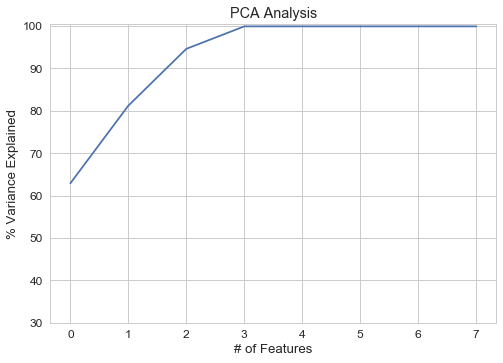

In [9]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)
/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


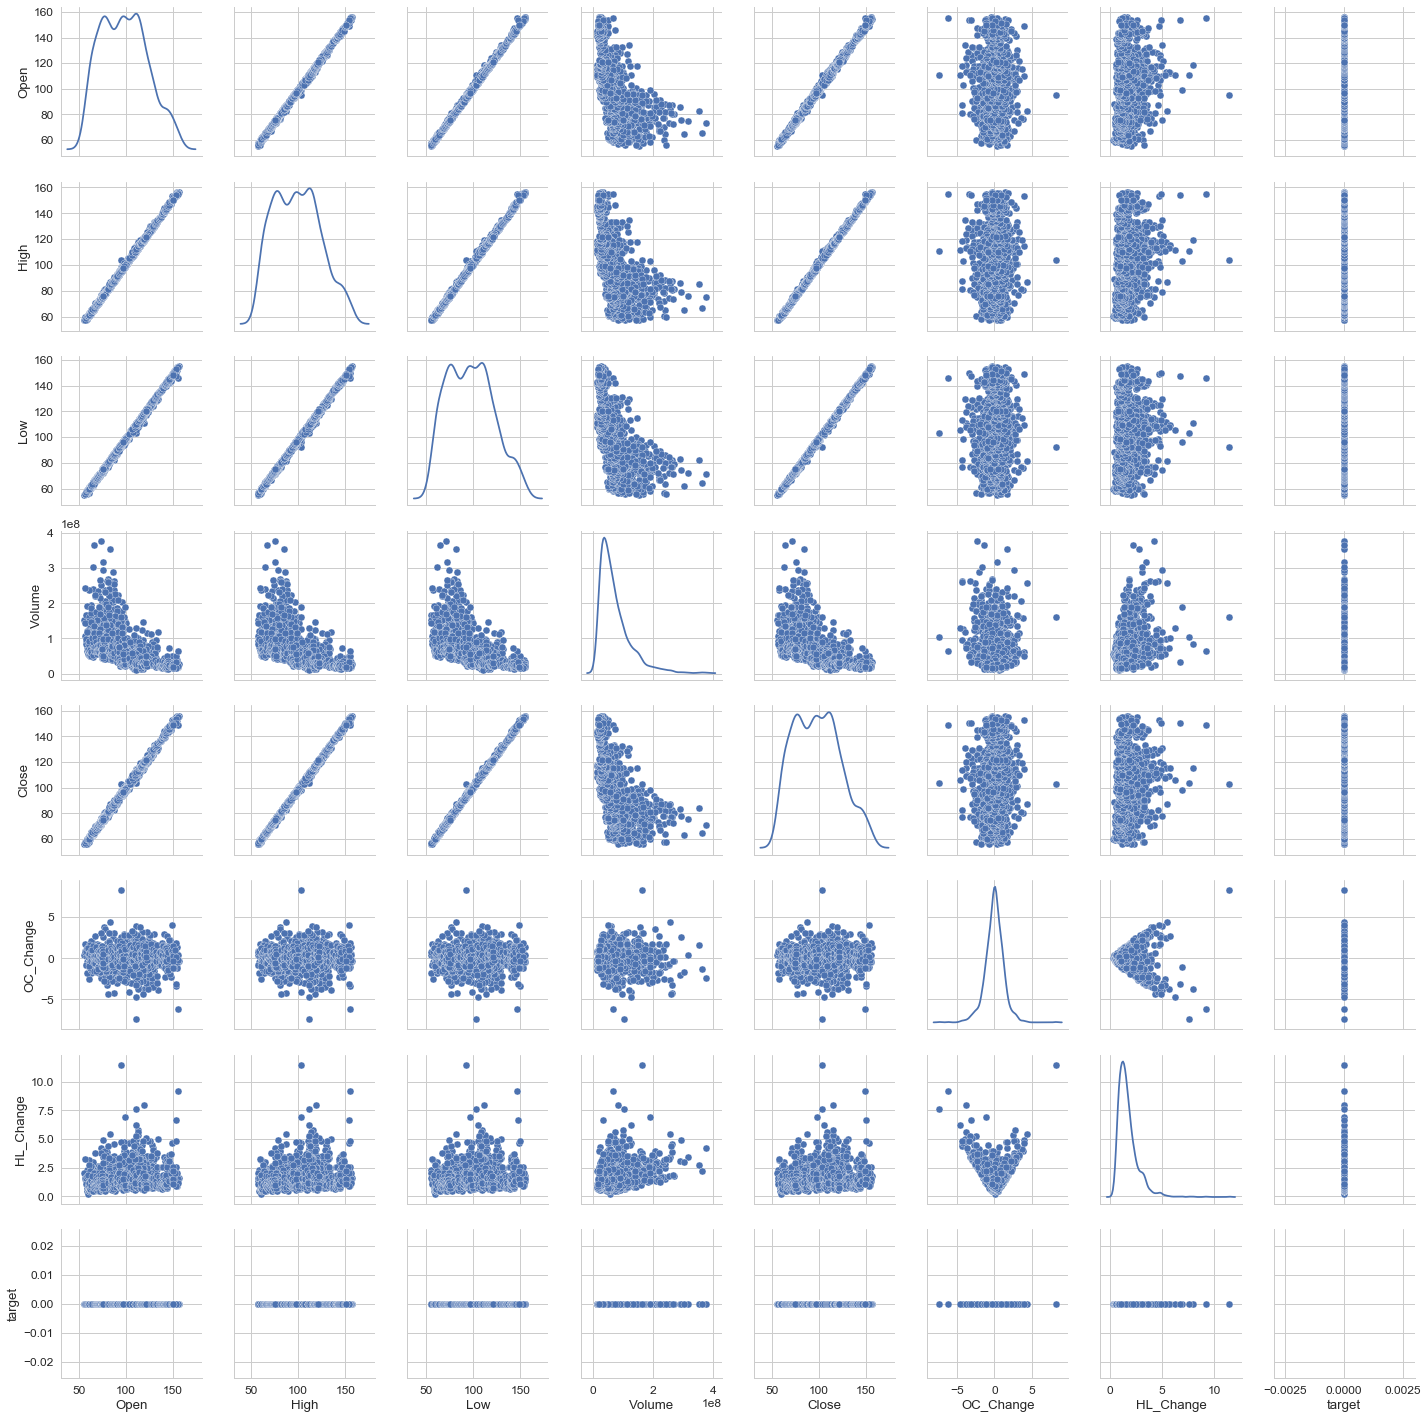

In [10]:
plot = sb.pairplot(t,diag_kind='kde')

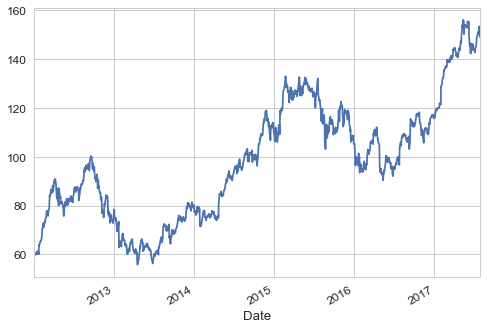

In [11]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
t['Close'].plot(grid=True)

# Show the plot
plt.show()

In [12]:
# Import `numpy` as `np`
import numpy as np

# Assign `Adj Close` to `daily_close`
daily_close = t[['Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

               Close
Date                
2012-01-03  0.000000
2012-01-04  0.005374
2012-01-05  0.011102
2012-01-06  0.010454
2012-01-09 -0.001586
2012-01-10  0.003580
2012-01-11 -0.001630
2012-01-12 -0.002745
2012-01-13 -0.003749
2012-01-17  0.011648
2012-01-18  0.010384
2012-01-19 -0.003169
2012-01-20 -0.017417
2012-01-23  0.016916
2012-01-24 -0.016378
2012-01-25  0.062439
2012-01-26 -0.004545
2012-01-27  0.005960
2012-01-30  0.012811
2012-01-31  0.007660
2012-02-01 -0.000635
2012-02-02 -0.002345
2012-02-03  0.010019
2012-02-06  0.009333
2012-02-07  0.010475
2012-02-08  0.016744
2012-02-09  0.034593
2012-02-10  0.000507
2012-02-13  0.018605
2012-02-14  0.013649
...              ...
2017-06-19  0.028608
2017-06-20 -0.009088
2017-06-21  0.005931
2017-06-22 -0.001645
2017-06-23  0.004463
2017-06-26 -0.003145
2017-06-27 -0.014333
2017-06-28  0.014611
2017-06-29 -0.014743
2017-06-30  0.002366
2017-07-03 -0.003611
2017-07-05  0.004111
2017-07-06 -0.009439
2017-07-07  0.010159
2017-07-10  0

In [13]:
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
print(daily_pct_change)

               Close
Date                
2012-01-03       NaN
2012-01-04  0.005374
2012-01-05  0.011102
2012-01-06  0.010454
2012-01-09 -0.001586
2012-01-10  0.003580
2012-01-11 -0.001630
2012-01-12 -0.002745
2012-01-13 -0.003749
2012-01-17  0.011648
2012-01-18  0.010384
2012-01-19 -0.003169
2012-01-20 -0.017417
2012-01-23  0.016916
2012-01-24 -0.016378
2012-01-25  0.062439
2012-01-26 -0.004545
2012-01-27  0.005960
2012-01-30  0.012811
2012-01-31  0.007660
2012-02-01 -0.000635
2012-02-02 -0.002345
2012-02-03  0.010019
2012-02-06  0.009333
2012-02-07  0.010475
2012-02-08  0.016744
2012-02-09  0.034593
2012-02-10  0.000507
2012-02-13  0.018605
2012-02-14  0.013649
...              ...
2017-06-19  0.028608
2017-06-20 -0.009088
2017-06-21  0.005931
2017-06-22 -0.001645
2017-06-23  0.004463
2017-06-26 -0.003145
2017-06-27 -0.014333
2017-06-28  0.014611
2017-06-29 -0.014743
2017-06-30  0.002366
2017-07-03 -0.003611
2017-07-05  0.004111
2017-07-06 -0.009439
2017-07-07  0.010159
2017-07-10  0

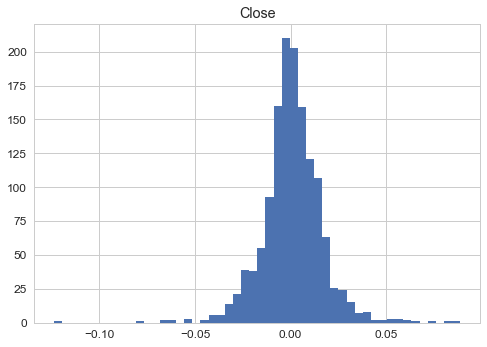

             Close
count  1402.000000
mean      0.000790
std       0.015932
min      -0.123558
25%      -0.006880
50%       0.000491
75%       0.009331
max       0.088741


In [14]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

In [15]:
import pandas_datareader as pdr
import datetime
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2012, 1, 1), datetime.datetime(2017, 8, 1))



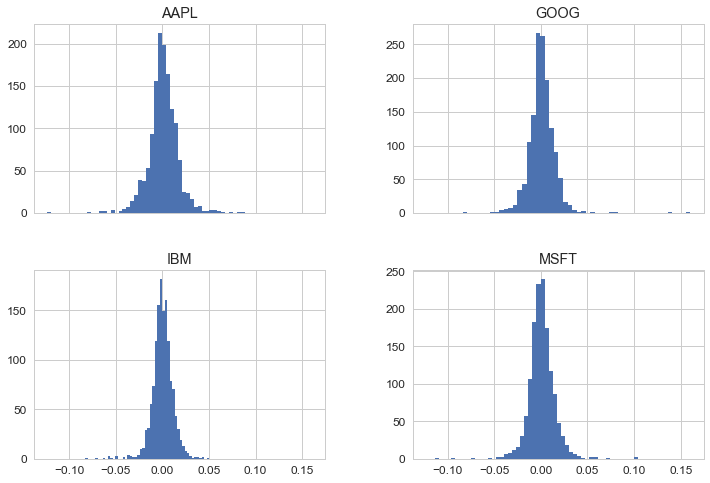

In [16]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


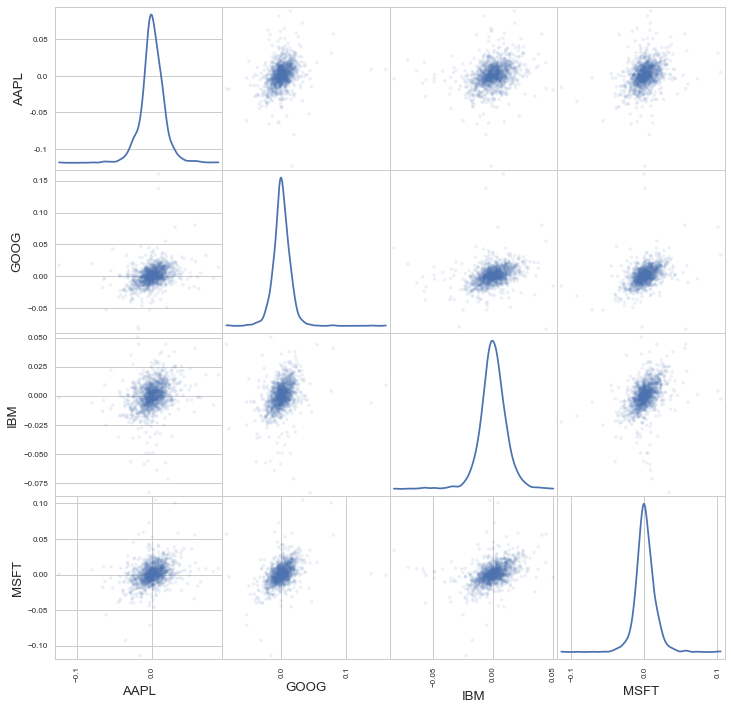

In [17]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot a scatter matrix with the `daily_pct_change` data 
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [18]:
t['target'][t['OC_Change']>0]=1
#t.drop(['HL_Change','OC_Change'],axis=1,inplace=True)
#for i in range(0,len(t)-1):
#    t['target'][i+1]=t['Close'][i+1]-t['Close'][i]

t['target']=t.Close.diff()
t['target'][0]=0
t['targ']=0
t['targ'][t['target']>0]=1
t
t.drop(['HL_Change','target'],axis=1,inplace=True)
t

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Volume,Close,OC_Change,targ
Date,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,75555200,58.747143,0.261429,0
2012-01-04,58.571430,59.240002,58.468571,65005500,59.062859,0.491429,1
2012-01-05,59.278572,59.792858,58.952858,67817400,59.718571,0.439999,1
2012-01-06,59.967144,60.392857,59.888573,79573200,60.342857,0.375713,1
2012-01-09,60.785713,61.107143,60.192856,98506100,60.247143,-0.538570,0
2012-01-10,60.844284,60.857143,60.214287,64549100,60.462856,-0.381428,1
2012-01-11,60.382858,60.407143,59.901428,53771200,60.364285,-0.018573,0
2012-01-12,60.325714,60.414288,59.821430,53146800,60.198570,-0.127144,0
2012-01-13,59.957142,60.064285,59.808571,56505400,59.972858,0.015716,0


In [19]:
t.head()

,Open,High,Low,Volume,Close,OC_Change,targ
Date,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,75555200,58.747143,0.261429,0
2012-01-04,58.571430,59.240002,58.468571,65005500,59.062859,0.491429,1
2012-01-05,59.278572,59.792858,58.952858,67817400,59.718571,0.439999,1
2012-01-06,59.967144,60.392857,59.888573,79573200,60.342857,0.375713,1
2012-01-09,60.785713,61.107143,60.192856,98506100,60.247143,-0.538570,0


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
X = t.iloc[:,0:6].values
y = t.iloc[:, 6].values
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


cl=SVC(kernel='poly',random_state=0) 
cl.fit(X_train, y_train)

# Predicting the Test set results
y_pred = cl.predict(X_test)
pp=cl.score(X_train,y_train)
print(pp*100)


51.4260249554


/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


TypeError: 'property' object is not subscriptable

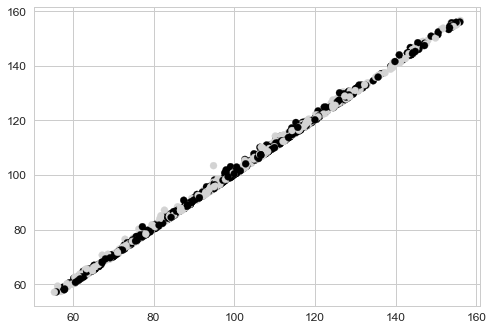

In [21]:
# Plot data points and color using their class
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_train[:,0], X_train[:,1], c=color)

# Create the hyperplane
w = SVC.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (SVC.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
## The line / model
plt.scatter(y_test,y_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
r=t
model.summary()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
t_x = t.drop(["targ","target"], axis = 1)
vif["vif factor"] = [variance_inflation_factor(r.values, i) for i in range(t_x.shape[1])]

vif["features"] = t_x.columns

In [ ]:
vif

In [ ]:
lrmodel2 =model.fit(X_train, Y_train)
pred_train = lrmodel2.predict(X_train2)
plt.scatter(pred_train, Y_train - pred_train)
plt.xlabel("Predicted Y")
plt.ylabel("Residual")
plt.title("Residual Plot using Training data")
plt.show()

In [ ]:
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

In [ ]:
plt.figure(figsize=(15,15), dpi=240)
plt.scatter(days_arr, prices_arr, color = 'black', label = 'Close Prices')

plt.plot(t, svr_lin.predict(days_arr), color = 'blue', linewidth = 3, label = 'Linear Model')
plt.plot(t, svr_poly.predict(days_arr), color = 'green', linewidth = 3, label = 'Polynomial Model')
plt.plot(t, svr_rbf.predict(days_arr), color = 'red', linewidth = 4, label = 'RBF Model')

plt.xlabel('Day')
plt.ylabel('Close')
plt.title('cl')
plt.ylim([minpr - 3, maxpr + 3])
plt.xlim([mindt - 1, maxdt + 5])
plt.subplots_adjust(bottom=0.13)
plt.subplots_adjust(top=0.92)
plt.subplots_adjust(left=0.07)
plt.subplots_adjust(right=0.96)
plt.legend()
plt.show()

In [ ]:
plot = sb.lmplot(X_train, y_train)

In [ ]:
xi = t.values #convert the data into a numpy array
xi = scale(x);x
covar_matrix = PCA(n_components = 7) #we have 20 features
covar_matrix.fit(xi)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features


In [ ]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [2]:
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

NameError: name 'X_train' is not defined